# Data Visualization 1
# Name : Shashank Udgirkar
# Batch:N3
# Roll no:31384

In [1]:
#Importing Required Libraries
import pandas as pd
import numpy as np
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# from word2number import w2n
import scipy.stats as stats
import pylab

In [ ]:
#Description of DATA 


Variable	Definition	Key
survival 	Survival 	0 = No, 1 = Yes
pclass 	Ticket class 	1 = 1st, 2 = 2nd, 3 = 3rd
sex 	Sex 	
Age 	Age in years 	
sibsp 	# of siblings / spouses aboard the Titanic 	
parch 	# of parents / children aboard the Titanic 	
ticket 	Ticket number 	
fare 	Passenger fare 	
cabin 	Cabin number 	
embarked 	Port of Embarkation 	C = Cherbourg, Q = Queenstown, S = Southampton

# Initial Preprocessing

In [2]:
df=pd.read_csv("titanic.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [55]:
df.shape

(891, 13)

# Handling Null Values

In [9]:
mean_age=df['Age'].mean()

In [10]:
df['Age']=df['Age'].fillna(mean_age)

In [11]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
df[df['Embarked']=='S'].count()

PassengerId    644
Survived       644
Pclass         644
Name           644
Sex            644
Age            644
SibSp          644
Parch          644
Ticket         644
Fare           644
Cabin          129
Embarked       644
dtype: int64

In [13]:
df[df['Embarked']=='C'].count()

PassengerId    168
Survived       168
Pclass         168
Name           168
Sex            168
Age            168
SibSp          168
Parch          168
Ticket         168
Fare           168
Cabin           69
Embarked       168
dtype: int64

In [14]:
df[df['Embarked']=='Q'].count()

PassengerId    77
Survived       77
Pclass         77
Name           77
Sex            77
Age            77
SibSp          77
Parch          77
Ticket         77
Fare           77
Cabin           4
Embarked       77
dtype: int64

# Data Visualization

/home/pict/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

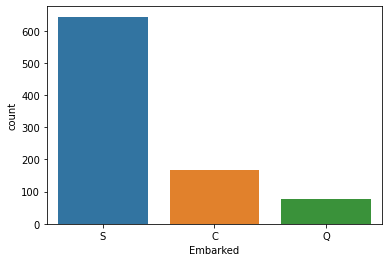

In [15]:
sns.countplot(df['Embarked'])
# S count is highest

In [16]:
df['Embarked']=df['Embarked'].fillna('S')

In [17]:
df1=df.drop(columns=['Cabin'])
# As it does not affect any pattern

In [18]:
df1.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [19]:
df1.shape

(891, 11)

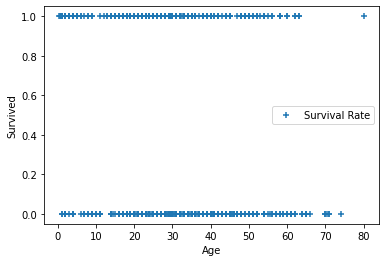

In [44]:
x1=df['Age']
y1=df['Survived']
plt.scatter(x1, y1, marker='+',label="Survival Rate")
plt.xlabel("Age")
plt.ylabel("Survived")
plt.legend()
plt.show()

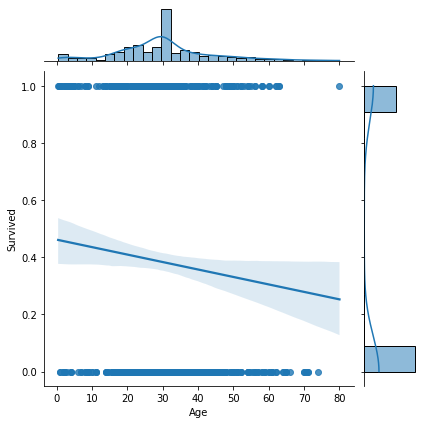

In [41]:
sns.jointplot(data=df,x=df['Age'], y=df['Survived'],kind='reg')

In [22]:
count_male=df[df['Survived']==1][df['Sex']=='male'].count()
count_male


/tmp/ipykernel_3375/2802482926.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  count_male=df[df['Survived']==1][df['Sex']=='male'].count()


PassengerId    109
Survived       109
Pclass         109
Name           109
Sex            109
Age            109
SibSp          109
Parch          109
Ticket         109
Fare           109
Cabin           45
Embarked       109
dtype: int64

In [23]:
count_female=df[df['Survived']==1][df['Sex']=='female'].count()
count_female


/tmp/ipykernel_3375/870298222.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  count_female=df[df['Survived']==1][df['Sex']=='female'].count()


PassengerId    233
Survived       233
Pclass         233
Name           233
Sex            233
Age            233
SibSp          233
Parch          233
Ticket         233
Fare           233
Cabin           91
Embarked       233
dtype: int64

/home/pict/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

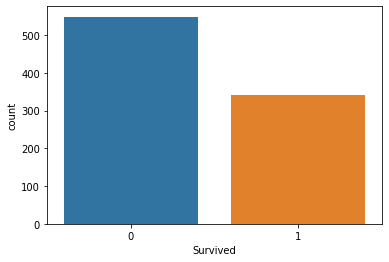

In [24]:
sns.countplot(df['Survived'])
# In total 300 survived

/home/pict/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

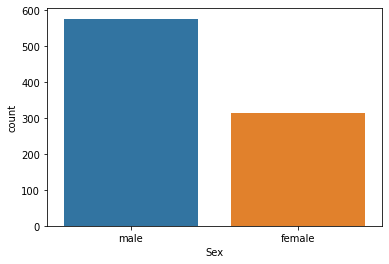

In [32]:
sns.countplot(df['Sex'])

In [25]:
y1=df[df['Sex']=='female'].count()
y1

PassengerId    314
Survived       314
Pclass         314
Name           314
Sex            314
Age            314
SibSp          314
Parch          314
Ticket         314
Fare           314
Cabin           97
Embarked       314
dtype: int64

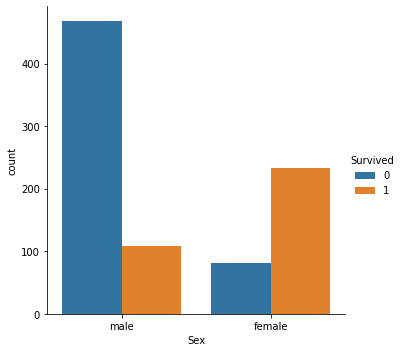

In [26]:
sns.catplot(x ="Sex", hue ="Survived",
kind ="count", data = df)
#gives count of how many males and females survived

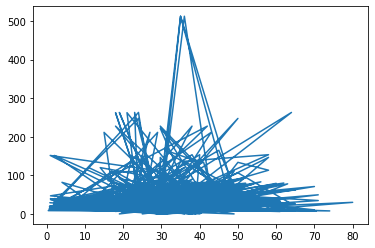

In [27]:
plt.plot(df['Age'],df['Fare'])

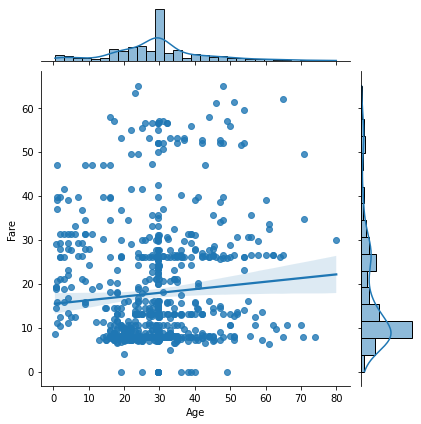

In [47]:
sns.jointplot(data=df_without_outliers,y=df_without_outliers['Fare'], x=df_without_outliers['Age'],kind='reg')

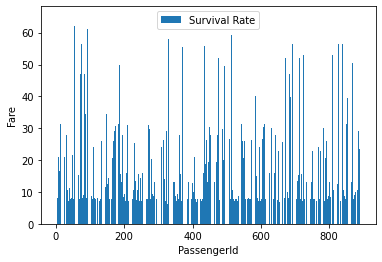

In [45]:
x1=df_without_outliers['PassengerId']
y1=df_without_outliers['Fare']
plt.bar(x1, y1,label="Survival Rate")
plt.xlabel("PassengerId")
plt.ylabel("Fare")
plt.legend()
plt.show()
#Conclusion is that normal rate is between 20-40

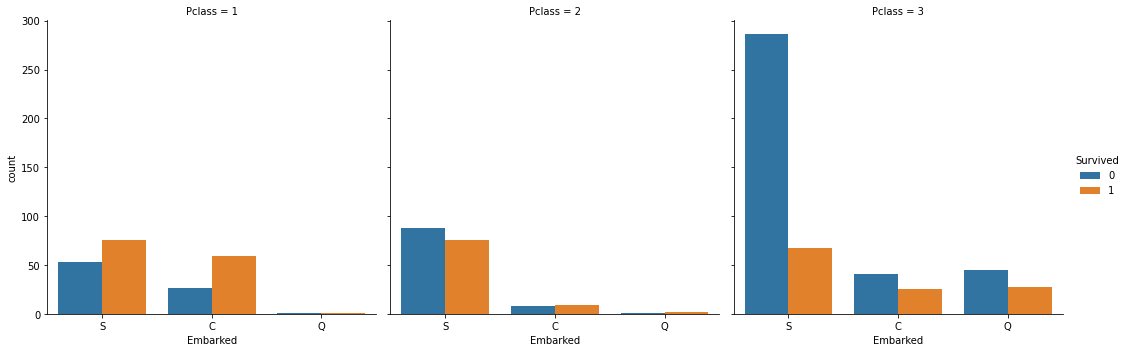

In [29]:
sns.catplot(x ='Embarked', hue ='Survived',
kind ='count', col ='Pclass', data = df)

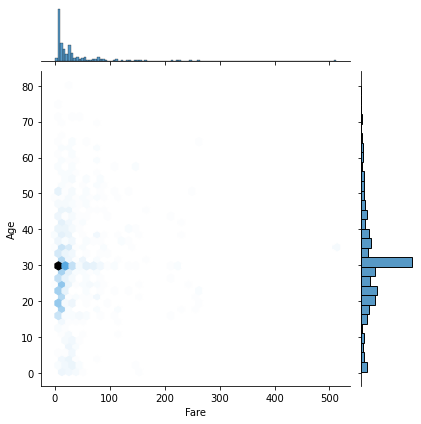

In [30]:
sns.jointplot(data=df,x=df['Fare'], y=df['Age'],kind='hex')

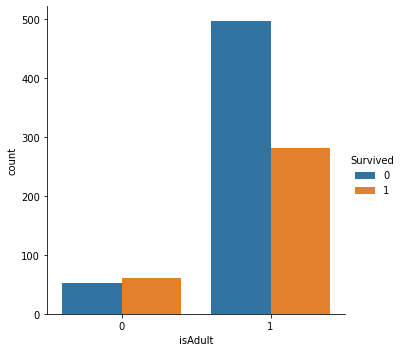

In [31]:
df['isAdult'] = np.where(df['Age']>=18,1,0)



sns.catplot(x ="isAdult", hue ="Survived",
kind ="count", data = df)

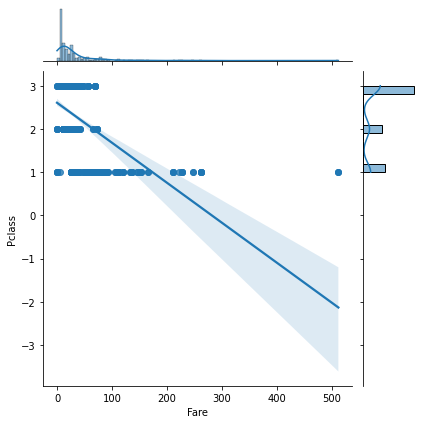

In [34]:
sns.jointplot(data=df,x=df['Fare'], y=df['Pclass'],kind='reg')

<AxesSubplot:xlabel='Fare'>

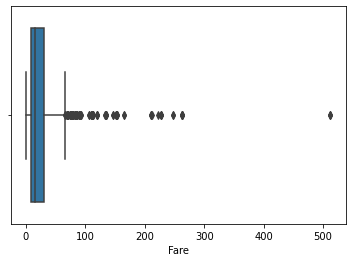

In [48]:
sns.boxplot(x=df['Fare'])

In [35]:
Q1=df['Fare'].quantile(0.25)
Q3=df['Fare'].quantile(0.75)
Q1,Q3

(7.9104, 31.0)

In [36]:
IQR=Q3-Q1
IQR

23.0896

In [37]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
lower_limit,upper_limit

(-26.724, 65.6344)

In [38]:
df[(df['Fare']<lower_limit)|(df['Fare']>upper_limit)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,isAdult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,1
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.000000,3,2,19950,263.0000,C23 C25 C27,S,1
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,29.699118,1,0,PC 17569,146.5208,B78,C,1
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.000000,1,0,PC 17604,82.1708,NaN,C,1
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.000000,1,0,PC 17572,76.7292,D33,C,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,847,0,3,"Sage, Mr. Douglas Bullen",male,29.699118,8,2,CA. 2343,69.5500,NaN,S,1
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,29.699118,1,0,17453,89.1042,C92,C,1
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.000000,1,1,36928,164.8667,NaN,S,1
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,29.699118,8,2,CA. 2343,69.5500,NaN,S,1


In [39]:
df_without_outliers=df[(df['Fare']>lower_limit)&(df['Fare']<upper_limit)]
df_without_outliers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,isAdult
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,1
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,1


<AxesSubplot:xlabel='Fare', ylabel='Count'>

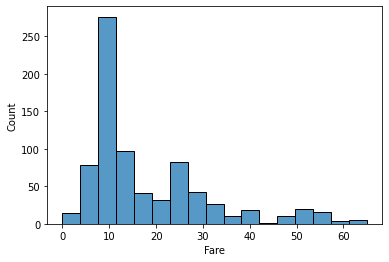

In [52]:
# Creating histogram
sns.histplot(data=df_without_outliers, x="Fare")
#The average rate lies between 10-30

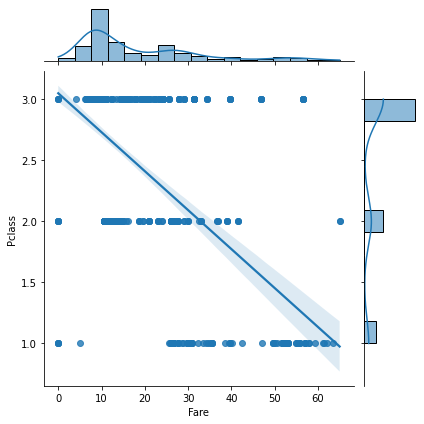

In [40]:
sns.jointplot(data=df_without_outliers,x=df_without_outliers['Fare'], y=df_without_outliers['Pclass'],kind='reg')
#Clearly Observed that first classranges between 30-40,second class ranges between 10-40,third class ranges between 0-30

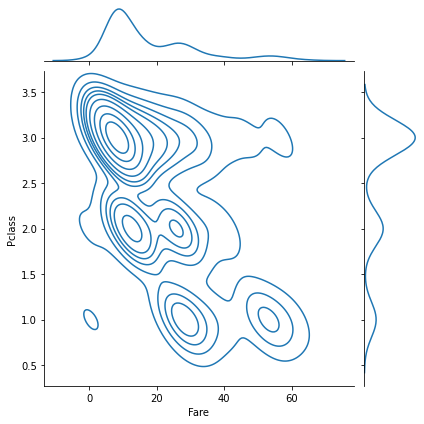

In [42]:
sns.jointplot(data=df_without_outliers,x=df_without_outliers['Fare'], y=df_without_outliers['Pclass'],kind='kde')